# Project 02

This analysis investigates the relationship between the probability of dying among children ages 5-9 years (per 1,000) and the probability of dying among youth ages 20-24 years (per 1,000). My hypothesis is that there is a strong positive correlation between these two variables. 

First, I will import the pandas library and define named constants for my variables.

In [64]:
import pandas as pd

CHILD_PROB: str = "SH.DYN.0509"
YOUTH_PROB: str = "SH.DYN.2024"

Next, I will read the CSV file into a dataframe.

In [65]:
df = pd.read_csv("../../data/databank_education_2018.csv")

Then, I will print the shape of the dataframe, and use the head method to display the first 10 rows.

In [66]:
print(df.shape)
df.head(10)

(244, 94)


,Country,SE.COM.DURS,SE.ENR.PRIM.FM.ZS,SE.ENR.PRSC.FM.ZS,SE.ENR.SECO.FM.ZS,SE.ENR.TERT.FM.ZS,SE.PRE.DURS,SE.PRE.ENRL.TC.ZS,SE.PRE.ENRR,SE.PRE.ENRR.FE,...,SH.DYN.1014,SH.DYN.1519,SH.DYN.2024,SL.TLF.TOTL.FE.ZS,SL.TLF.TOTL.IN,SL.UEM.TOTL.FE.ZS,SL.UEM.TOTL.MA.ZS,SL.UEM.TOTL.ZS,SP.POP.0014.TO.ZS,SP.POP.1564.TO.ZS
0,Afghanistan,9.0,0.66691,0.63602,0.57098,0.34523,1.0,NaN,NaN,NaN,...,2.000000,13.800000,17.600000,21.247021,10319282.0,13.920000,10.290000,11.060000,43.090176,54.324898
1,Albania,9.0,1.03765,1.01730,1.00539,1.36299,5.0,17.09409,80.498734,80.790977,...,1.100000,1.800000,1.900000,42.190687,1400072.0,11.870000,12.620000,12.300000,17.672874,68.582390
2,Algeria,10.0,0.95499,NaN,NaN,1.39722,1.0,NaN,NaN,NaN,...,1.700000,2.700000,3.300000,20.126974,12589369.0,20.490000,9.720000,11.890000,30.148679,63.488825
3,Andorra,10.0,NaN,NaN,NaN,NaN,3.0,13.27711,NaN,NaN,...,0.500000,1.400000,2.100000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Angola,6.0,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,...,6.400000,13.100000,19.900000,50.202910,12705650.0,7.280000,6.720000,7.000000,46.808925,50.974702
5,Antigua and Barbuda,11.0,0.99208,0.97924,0.96286,NaN,5.0,NaN,70.253601,74.025070,...,1.000000,2.500000,3.200000,NaN,NaN,NaN,NaN,NaN,22.081092,69.119083
6,Arab World,9.0,0.94617,0.94833,0.95186,1.09935,3.0,21.16757,27.001801,26.855440,...,2.923226,6.268086,8.017785,20.368759,134761988.0,19.903642,7.788688,10.256798,32.780436,62.661687
7,Argentina,14.0,NaN,NaN,NaN,NaN,6.0,NaN,NaN,NaN,...,1.100000,3.500000,4.900000,43.001857,20551682.0,10.540000,8.230000,9.220000,24.760934,64.121277
8,Armenia,12.0,0.99961,1.02283,1.03762,1.24788,3.0,6.27090,38.021290,39.659691,...,1.000000,2.300000,2.700000,44.231575,1245626.0,20.400000,17.830000,18.969999,20.633422,68.112760
9,Aruba,13.0,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.802447,68.646606


Then, I will select the proper column subsets for the data I want to analyze.

In [67]:
columns = df[["Country", f"{CHILD_PROB}", f"{YOUTH_PROB}"]]
print(columns.head(10))

               Country  SH.DYN.0509  SH.DYN.2024
0          Afghanistan     2.500000    17.600000
1              Albania     1.000000     1.900000
2              Algeria     1.700000     3.300000
3              Andorra     0.400000     2.100000
4               Angola    10.800000    19.900000
5  Antigua and Barbuda     0.700000     3.200000
6           Arab World     3.740771     8.017785
7            Argentina     0.800000     4.900000
8              Armenia     1.000000     2.700000
9                Aruba          NaN          NaN


Then, I will filter out the rows of data that do not contain numeric entries in the columns whose data I want to analyze. 

In [68]:
columns_not_na = columns[columns[f"{CHILD_PROB}"].notna() & columns[f"{YOUTH_PROB}"].notna()]
print(columns_not_na.shape)
print(columns_not_na.head(10))

(233, 3)
                Country  SH.DYN.0509  SH.DYN.2024
0           Afghanistan     2.500000    17.600000
1               Albania     1.000000     1.900000
2               Algeria     1.700000     3.300000
3               Andorra     0.400000     2.100000
4                Angola    10.800000    19.900000
5   Antigua and Barbuda     0.700000     3.200000
6            Arab World     3.740771     8.017785
7             Argentina     0.800000     4.900000
8               Armenia     1.000000     2.700000
10            Australia     0.400000     2.000000


Next, I will put the values in descending order based on the child death probabilities.

In [69]:
sorted_columns = columns_not_na.sort_values(by=f"{CHILD_PROB}", ascending=False)
print(sorted_columns.head(10))

           Country  SH.DYN.0509  SH.DYN.2024
199        Somalia         17.3         26.3
161          Niger         16.3         17.2
39            Chad         15.7         19.8
34        Cameroon         14.7         17.9
47   Cote d'Ivoire         14.6         15.7
193   Sierra Leone         14.3         28.1
140           Mali         14.2         12.1
162        Nigeria         13.7         10.7
85          Guinea         13.0         18.7
20           Benin         12.9         11.3


Then, I will use this sorted data to create a scatter plot. 

Text(0.5, 1.0, 'Death Probability Correlation')

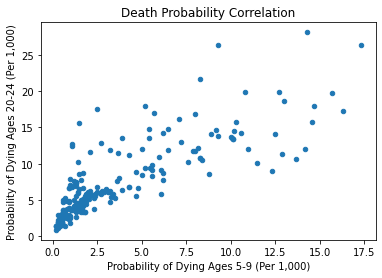

In [80]:
final_scatter = sorted_columns.plot.scatter(f"{CHILD_PROB}", f"{YOUTH_PROB}")
final_scatter.set_xlabel("Probability of Dying Ages 5-9 (Per 1,000)")
final_scatter.set_ylabel("Probability of Dying Ages 20-24 (Per 1,000)")
final_scatter.set_title("Death Probability Correlation")

After this, I will determine the correlation coefficient for the data. 

In [72]:
sorted_columns[f"{CHILD_PROB}"].corr(sorted_columns[f"{YOUTH_PROB}"])

0.8265579960537024

## Conclusion

After analyzing the data, I found a strong positive correlation between the probabilities of dying between ages 5-9 and ages 20-24. The value of this correlation coefficient was approximately 0.827. I expected a strong relationship like this, although a different outcome would not have surprised me. If it is very likely one will die between the ages of 5 and 9, one would expect only the stronger ones to survive, meaning the probability of dying between ages 20 and 24 would be much lower. However, this did not seem to be the case. This analysis cannot be used to determine much besides the correlation, but it was able to find a strong correlation at least. 